Check the different data distributions for rulers and patches

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 24 00:00:55 2019

@author: lauri
"""
save_path = "../results_for_export"
import csv
import numpy as np
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny
from shutil import copyfile
from os.path import join as oj
from PIL import Image
from skimage.color import rgb2gray
from tqdm import tqdm, tqdm_notebook
def has_line(img):
    bw_img = rgb2gray(img) 
    lines = probabilistic_hough_line(canny(bw_img, sigma=2), threshold=40, line_length=200,
                                 line_gap=10)
    lines = [line for line in lines if line[0][0] != line[1][0] and line[0][1] != line[1][1]  ]
    
    return len(lines) >0
    
def highlight_line(img):
    bw_img = rgb2gray(img) 
    lines = probabilistic_hough_line(canny(bw_img, sigma=2), threshold=40, line_length=200,
                                 line_gap=10)
    lines = [line for line in lines if line[0][0] != line[1][0] and line[0][1] != line[1][1]  ]
    
    return lines

In [3]:
dataset_path = "/home/lauri/datasets/ISIC"
    
meta_file = "ISIC_y.csv"
mal_folder = oj(dataset_path, 'cancer')

In [4]:

list_of_meta = []
with open(oj(dataset_path, meta_file), newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        list_of_meta.append(row)    
#%%

In [5]:
list_mal_files = []
for line in list_of_meta[1:]:
    if line[1] == 'malignant':
        list_mal_files.append(line[0] + ".jpg")

#%%
num_lines = 0
num_total = 0

In [29]:
imgs = np.empty((len(list_mal_files), 450, 600, 3 ))

In [78]:
for i,file_name in tqdm_notebook(enumerate(list_mal_files)):

    try:
        img = Image.open(oj(mal_folder, file_name))
        imgs[i] = np.asarray(img)
    except:
        print("BB")
        pass
        
imgs /=255.0

BB
BB
BB
BB



In [79]:
imgs_with_rulers = []
for i in tqdm_notebook(range(len(list_mal_files[:500]))):
    if has_line(imgs[i]):
        imgs_with_rulers.append(imgs[i])
    

In [82]:
from skimage.draw import line as draw_line

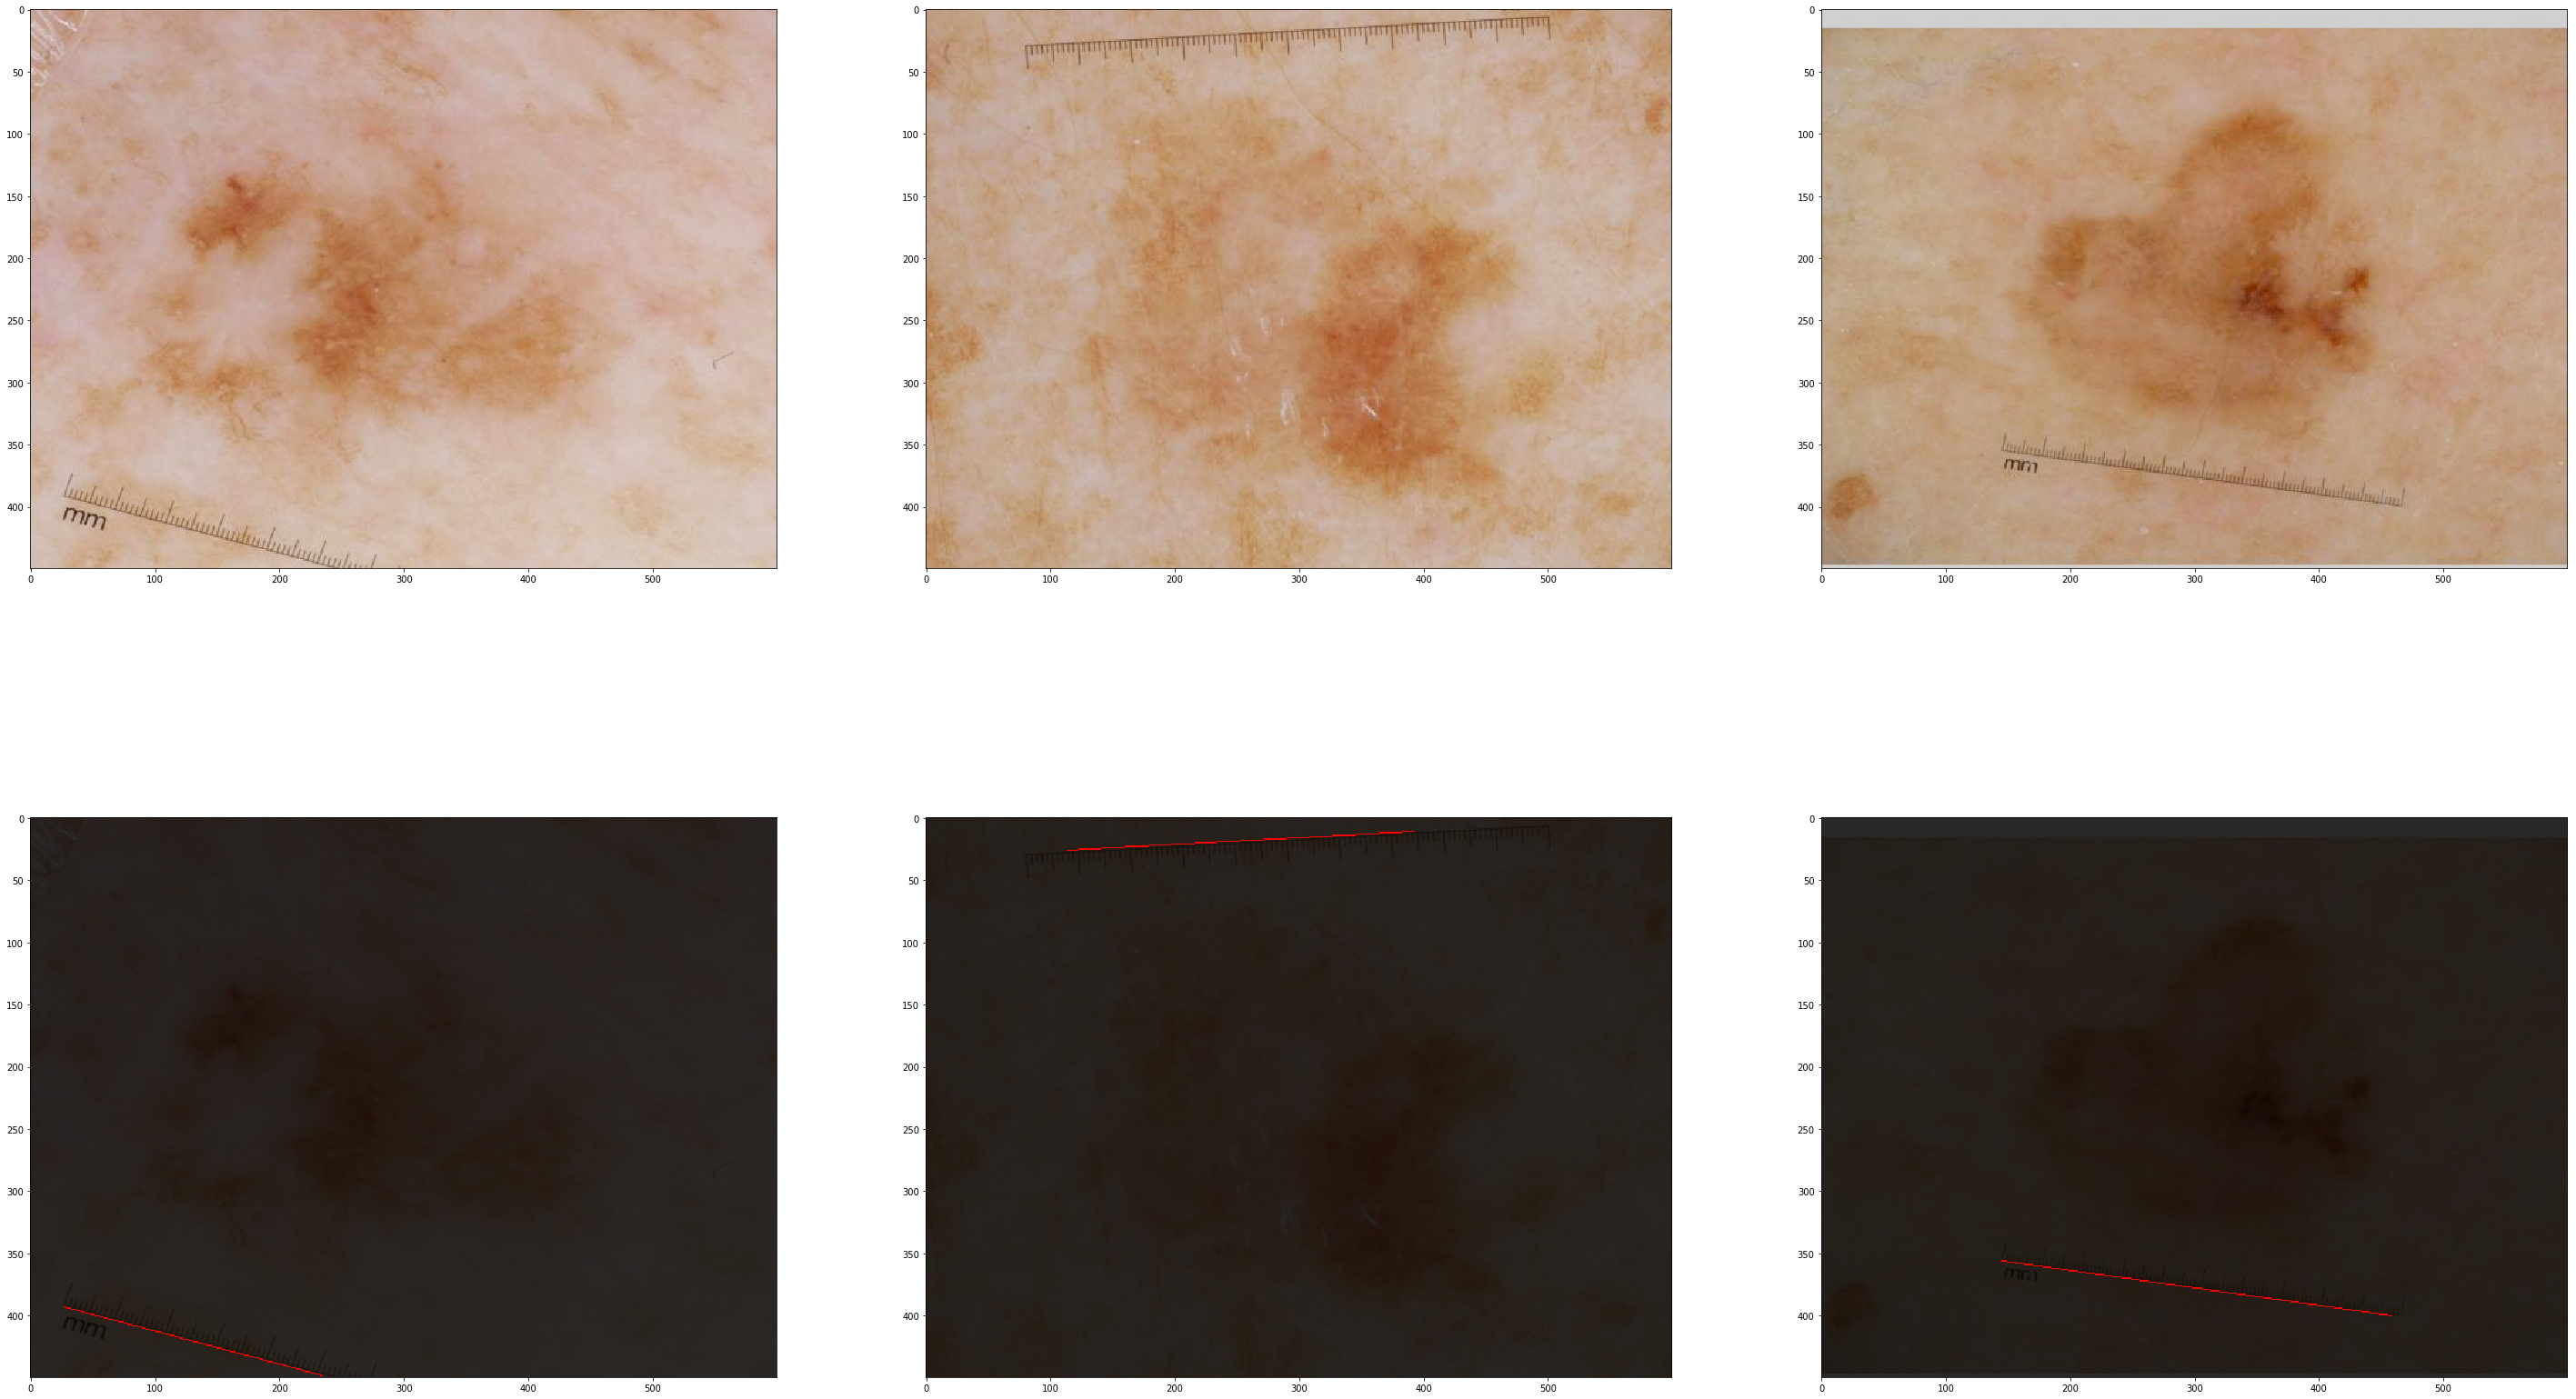

In [116]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (50,30))
for i in range(3):
    axes[0, i].imshow(imgs_with_rulers[i+2])
    

    lines = highlight_line(imgs_with_rulers[i+2])
    img = imgs_with_rulers[i+2].copy()/5
    cur_line = lines[0]
    p0, p1 = cur_line

    line_x, line_y = draw_line(p0[1], p0[0], p1[1], p1[0])

    img[line_x, line_y] = [1,0,0]
    axes[1, i].imshow(img)

In [117]:
fig.savefig(oj(save_path, "ruler_detection"))